In [25]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [26]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [27]:

%%time
data_root = os.path.join("/", "mnt", "hgfs", "Temp", "DSA", "ravi", "data")
uc_path =os.path.join(data_root, "uc1.csv") 


CPU times: user 4 µs, sys: 13 µs, total: 17 µs
Wall time: 20.5 µs


In [60]:

uc_data = pd.read_csv(uc_path, header=None)
uc_data1 = uc_data.set_axis(['date', 'customers'], axis=1, inplace=True)                      


In [63]:
uc_data

,date,customers
0,01/12/2018,1535143
1,01/01/2019,1618043
2,01/02/2019,1706607
3,01/03/2019,1816280
4,01/04/2019,1940904
5,01/05/2019,2026245
6,01/06/2019,2151015
7,01/07/2019,2249063
8,01/08/2019,2350373
9,01/09/2019,2454646


In [64]:
uc_data.shape

(34, 2)

0 date
1 customers


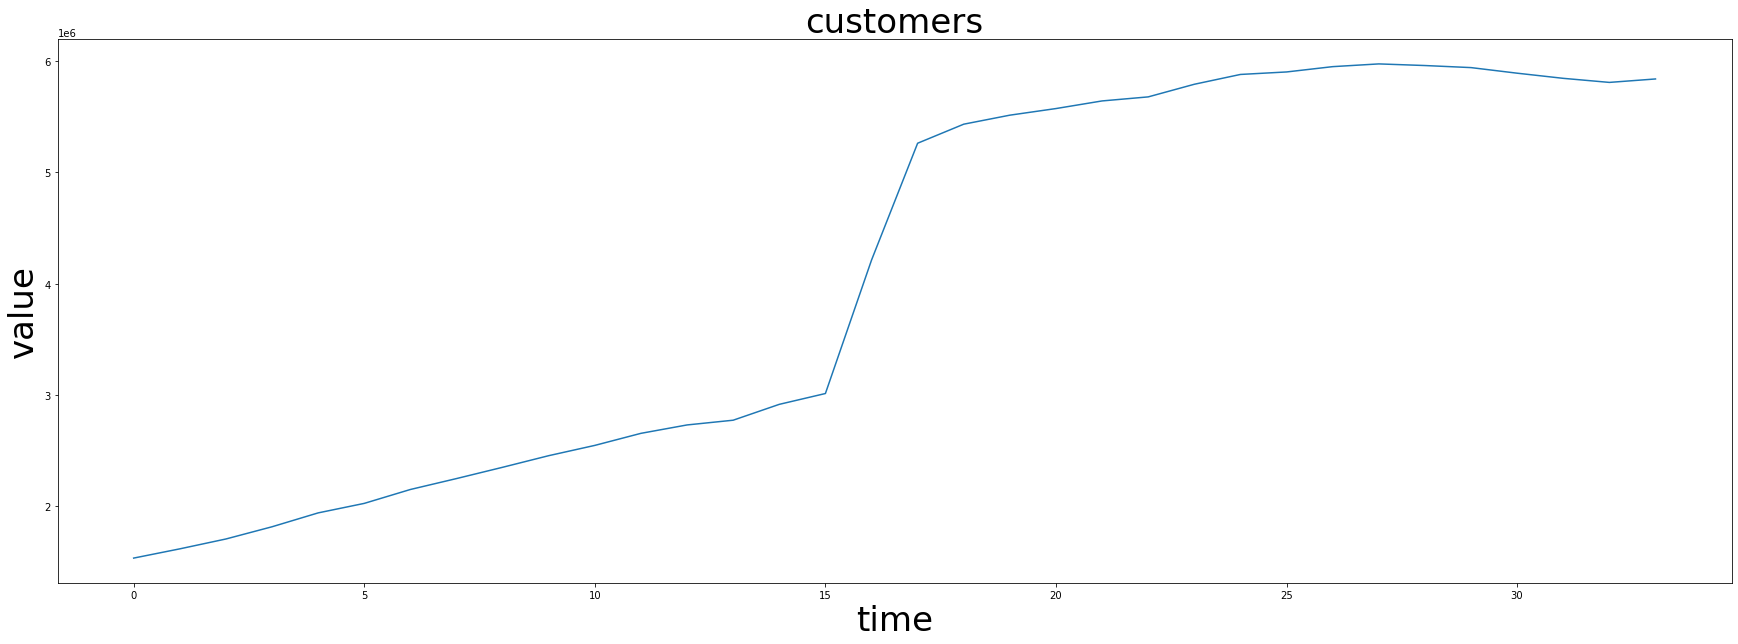

In [65]:
for ind, column in enumerate(uc_data.columns):
    print(ind, column)
    if ind != 0:
        fig, ax = plt.subplots(figsize=(30, 10))
        uc_data[column].head(100000).plot(ax=ax)
        ax.set_xlabel('time',  fontsize=34)
        ax.set_ylabel('value',  fontsize=34)
        ax.set_title(column, fontsize=34)
        

In [66]:
uc_data[["date"]] = uc_data[["date"]].apply(pd.to_datetime)
uc_data = uc_data.set_index('date')
uc_data = uc_data.sort_index()

In [67]:
training_data = uc_data[:27]
training_data.shape

(27, 1)

In [68]:
testing_data = uc_data[27:]
testing_data.shape

(7, 1)

In [69]:
training_data

,customers
date,
2018-01-12,1535143
2019-01-01,1618043
2019-01-02,1706607
2019-01-03,1816280
2019-01-04,1940904
2019-01-05,2026245
2019-01-06,2151015
2019-01-07,2249063
2019-01-08,2350373


In [70]:
testing_data

,customers
date,
2021-01-03,5972083
2021-01-04,5957521
2021-01-05,5938914
2021-01-06,5888753
2021-01-07,5842568
2021-01-08,5806038
2021-01-09,5836961


In [72]:
print(training_data.shape, testing_data.shape)

(27, 1) (7, 1)


In [81]:

import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [82]:
y_train = training_data['customers'].to_numpy(copy=True, dtype=str)
y_test = testing_data['customers'].to_numpy(copy=True, dtype=str)


In [83]:

ploting_data = pd.DataFrame(testing_data['customers'])


In [84]:
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [85]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27, 1) (7, 1) (27,) (7,)


In [86]:
reg = RandomForestRegressor()

In [87]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
preds = reg.predict(X_test)


In [89]:
mse = mean_squared_error(y_test, preds)

/home/ubuntu/miniconda3/envs/gridding/lib/python3.7/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [90]:
y_test

array(['5972083', '5957521', '5938914', '5888753', '5842568', '5806038',
       '5836961'], dtype='<U21')

In [91]:
preds

array([5925470.81, 5925470.81, 5925470.81, 5895393.76, 5857978.57,
       5817285.23, 5857978.57])

In [92]:
mse

604350583.6412435

In [93]:
testing_data['predictions'] = preds

/home/ubuntu/miniconda3/envs/gridding/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
y_test

array(['5972083', '5957521', '5938914', '5888753', '5842568', '5806038',
       '5836961'], dtype='<U21')

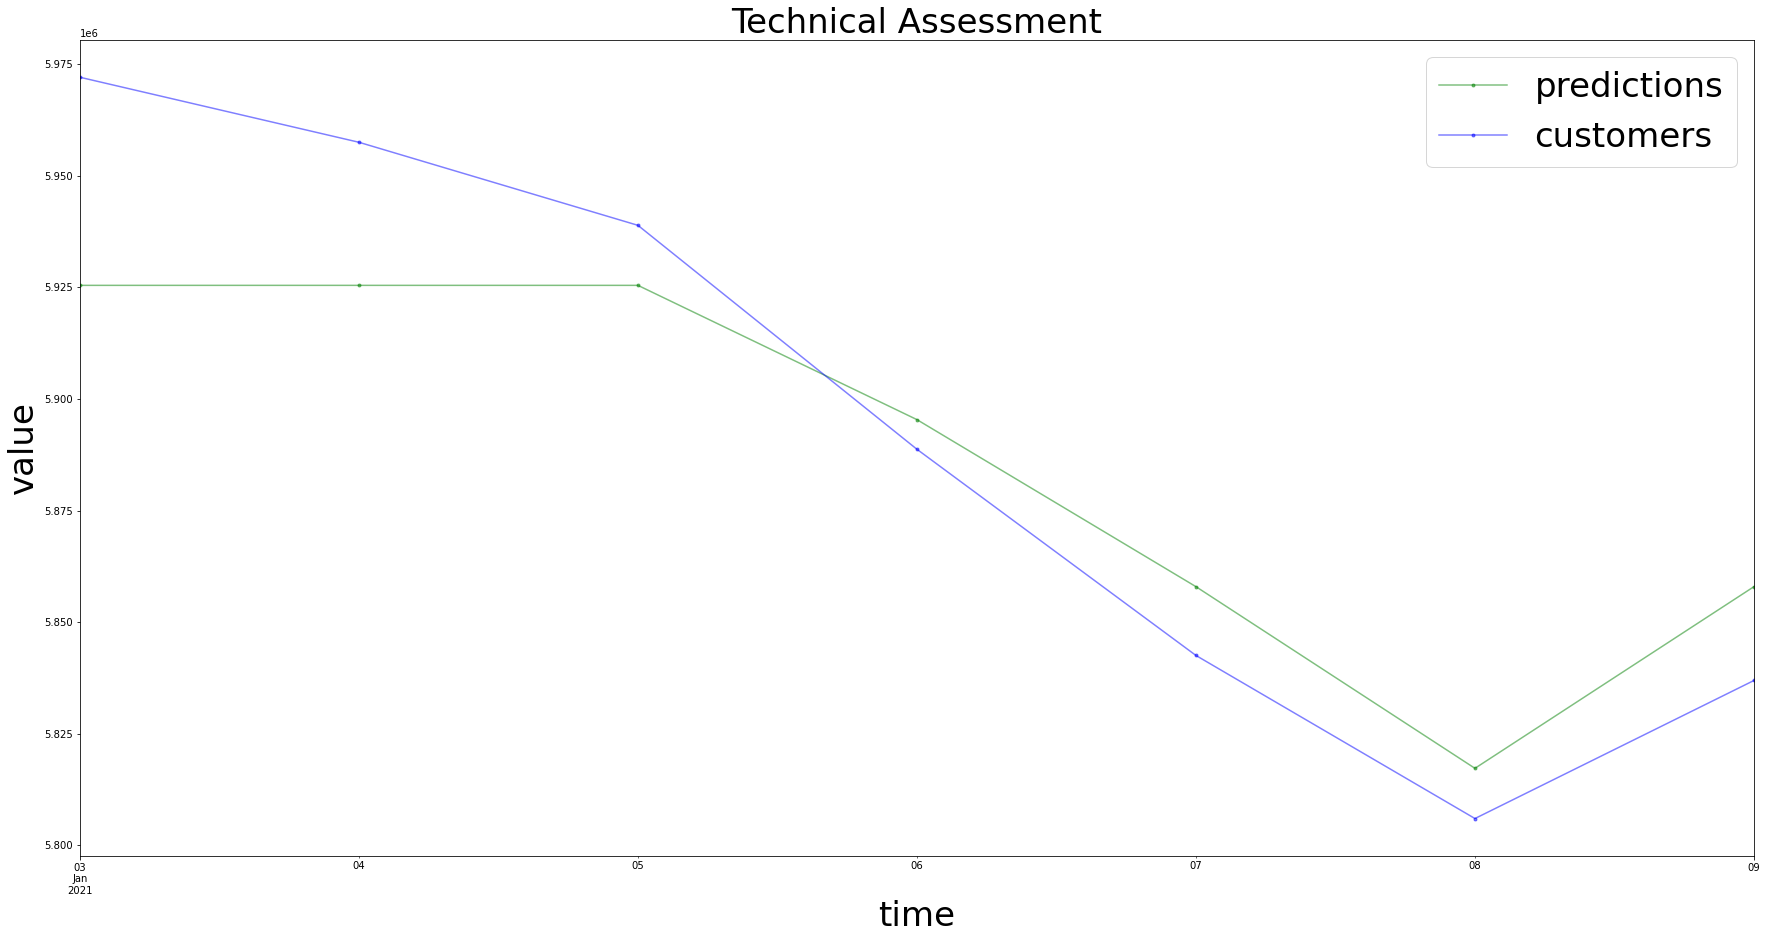

In [96]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['customers'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('time',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)

In [ ]:
# next steps pdp